In [115]:

import numpy as np
import sklearn 
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,RBF
from sklearn.metrics import mean_squared_error

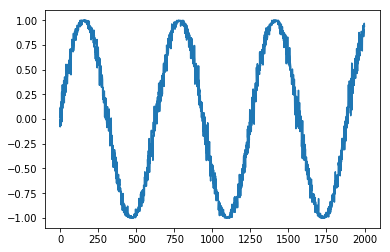

In [126]:
X=np.array([i*0.01+0.09*np.random.randn(1)[0] for i in range(2000)])
y=np.array([np.sin(i) for i in X])
plt.plot(y,markersize=1)

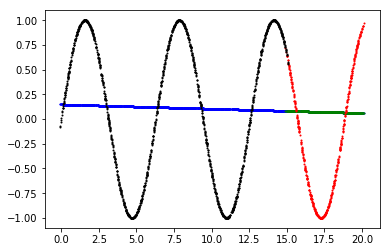

0.4573472623354164


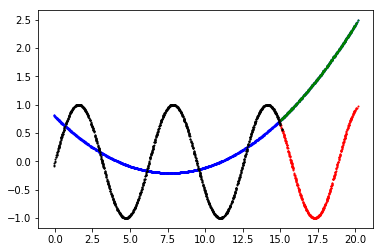

3.4183074045493713


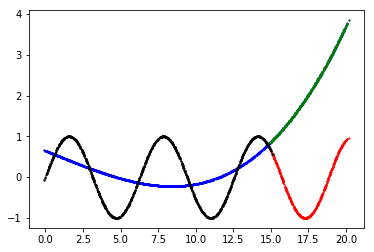

6.19852142865947


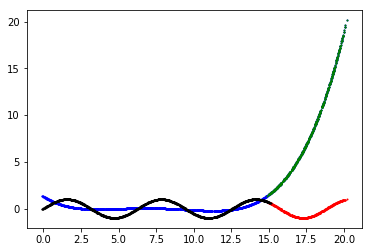

90.53574522284563


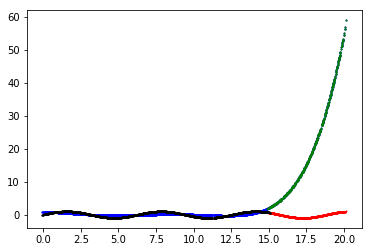

611.257381872351


/home/kamil/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.39711e-17): result may not be accurate.
  overwrite_a=True).T


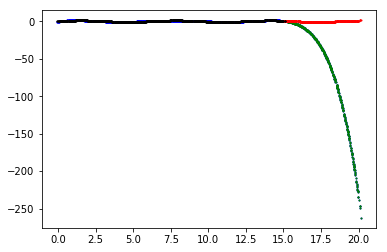

8191.589034616974


/home/kamil/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.12422e-19): result may not be accurate.
  overwrite_a=True).T


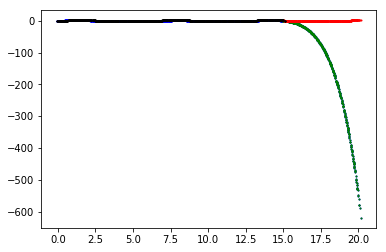

43092.479607049754


/home/kamil/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.00847e-21): result may not be accurate.
  overwrite_a=True).T


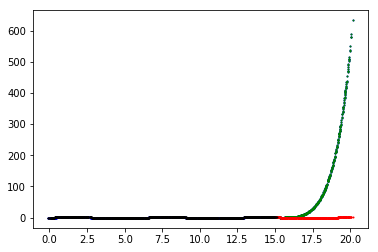

30403.196219340734


/home/kamil/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.7071e-24): result may not be accurate.
  overwrite_a=True).T


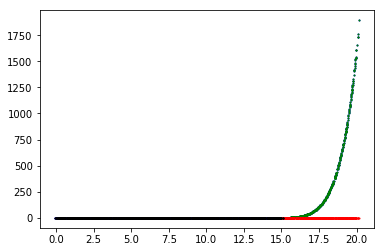

283099.6039416262


In [127]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X_train=X[0:1500]
X_test=X[1500:2000]
y_train=y[0:1500]
y_test =y[1500:2000]
for degree in [1,2,3, 4, 5,6,7,8,9]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train,y_train)
    y_plot = model.predict(X_test)
    y_total=model.predict(X)

    plt.plot(X,y_total,'bo',markersize=1)
    plt.plot(X_test,y_plot,'go',markersize=1)
    plt.plot(X_test,y_test,'ro',markersize=1)
    plt.plot(X_train,y_train,'ko',markersize=1)
    
    plt.show()
    print(mean_squared_error(y_plot,y_test))

/home/kamil/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.0031395 ,  0.03564453, -0.18378847,  0.32421875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 83, 'nit': 18, 'warnflag': 2}
  ConvergenceWarning)


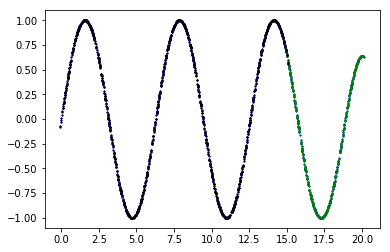

In [143]:
kernel = DotProduct() + 0.5*RBF(0.2)+100
gpr = GaussianProcessRegressor(kernel=kernel).fit(X_train, y_train)

y_plot = gpr.predict(X_test)
y_total=gpr.predict(X)
y_pred=gpr.predict(X_train)
plt.plot(X,y_total,'bo',markersize=1)
plt.plot(X_test,y_plot,'go',markersize=1)
#plt.plot(X_test,y_test,'ro',markersize=1)
plt.plot(X_train,y_train,'ko',markersize=1)    
plt.show()
